In [1]:
#### Misc functions
import numpy as np

# one hot function
def OneHot(Yin, K):
  n_classes = K
  # one hot each indices of the list using eye function
  Yout = np.eye(n_classes)[Yin]
  return Yout

def Scaling(arr):
  new_arr = np.empty((arr.shape))
  arr_mean = np.mean(arr)
  arr_max, arr_min = np.max(arr), np.min(arr)
  new_arr = (arr - arr_mean) / (arr_max - arr_min)

  return new_arr

def CalcAcc(Ytest, Ypred):
  correct = 0
  wrong = 0
  if Ytest.shape != Ypred.shape:
    raise ValueError("Size mismatch!")
  for i in range(0, len(Ytest)):
    if np.argmax(Ytest[i]) == np.argmax(Ypred[i]):
      # true values
      correct +=1
    else:
      # false values
      wrong += 1
  
  # return accuracy and error
  return correct / (correct + wrong), wrong / (correct + wrong)

In [ ]:
#### Dataset Preparation

In [2]:
#### Iris dataset
import numpy as np

# read file and save into list of lines
iris_file = './drive/MyDrive/iris.data'
iris_lst = []
with open(iris_file) as f:
  iris_lines = f.readlines()

# this is for the label
# remove trailing new line and obtain class name to be labelled, then append it as label indices
iris_lines.remove('\n')
print(len(iris_lines))
for i in range(0, len(iris_lines)):
  dt = iris_lines[i].split(",")[-1].split("\n")[-2]
  iris_lst.append(dt)

# obtain unique elements from list
iris_txt = set(iris_lst)

# assign an index to each unique element and map to dictionary
iris_dict = {}
counter = 0
for i in iris_txt:
   iris_dict[i] = counter
   counter += 1
# show class names which are mapped to indices
print(iris_dict)

# append data list with class names to be used as labels
iris_lbl = []
for i in range(0, len(iris_lst)):
  iris_lbl.append(iris_dict[iris_lst[i]])

# One-Hot labels
iris_ohlbl = OneHot(iris_lbl, len(set(iris_lbl)))

# obtain data
iris_data = []
for i in range(0, len(iris_lines)):
  int_list = []
  data_arr = iris_lines[i].split("\n")[-2].rsplit(',', 1)[0]
  mat_elm = data_arr.rsplit(',')
  # convert each string element in the list into float for computation
  for j in range(0, len(mat_elm)):
    int_list.append(float(mat_elm[j]))
  iris_data.append(int_list)

# finally, convert the list into numpy array
iris_data = np.array(iris_data)

print("Label shape (One-Hot):", iris_ohlbl.shape, "Data shape:", iris_data.shape)

150
{'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2}
Label shape (One-Hot): (150, 3) Data shape: (150, 4)


TRAIN: Label shape (One-Hot): (3823, 10) Data shape: (3823, 64)
TEST: Label shape (One-Hot): (1797, 10) Data shape: (1797, 64)
Array: [[ 0.  0.  2. 14. 15.  5.  0.  0.]
 [ 0.  0. 10. 16. 16. 15.  1.  0.]
 [ 0.  3. 16. 10. 10. 16.  4.  0.]
 [ 0.  5. 16.  0.  0. 14.  6.  0.]
 [ 0.  5. 16.  6.  0. 12.  7.  0.]
 [ 0.  1. 15. 13.  4. 13.  6.  0.]
 [ 0.  0. 11. 16. 16. 15.  0.  0.]
 [ 0.  0.  2. 11. 13.  4.  0.  0.]] 
 Class:  0


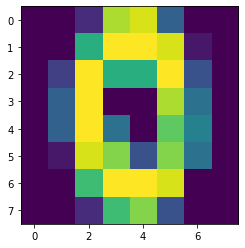

In [3]:
#### Optical Recognition of Handwritten digits dataset
digit_train = './drive/MyDrive/optdigits.tra'
digit_test = './drive/MyDrive/optdigits.tes'

tra_lbl = []
tra_data = []
tes_lbl = []
tes_data = []

# read file and save into list of lines
with open(digit_train) as f:
  tra_lines = f.readlines()

with open(digit_test) as f:
  tes_lines = f.readlines()

# obtain train dataset and label
for i in range(0, len(tra_lines)):
  digit_tra = []
  trdlbl = tra_lines[i].split(",")[-1]
  tra_lbl.append(int(trdlbl))

  tra_str = tra_lines[i].split(trdlbl)[-2].split(',')[:-1]
  for j in range(0, len(tra_str)):
    digit_tra.append(float(tra_str[j]))
  tra_data.append(digit_tra)

tra_data = np.array(tra_data)
tra_lbl = np.array(tra_lbl)

# obtain test dataset and label
for i in range(0, len(tes_lines)):
  digit_tes = []
  tedlbl = tes_lines[i].split(",")[-1]
  tes_lbl.append(int(tedlbl))

  tes_str = tes_lines[i].split(tedlbl)[-2].split(',')[:-1]
  for j in range(0, len(tes_str)):
    digit_tes.append(float(tes_str[j]))
  tes_data.append(digit_tes)

tes_data = np.array(tes_data)
tes_lbl = np.array(tes_lbl)

# One-Hot train and test labels
tra_ohlbl = OneHot(tra_lbl, len(set(tra_lbl)))
tes_ohlbl = OneHot(tes_lbl, len(set(tes_lbl)))
tra_scdata = Scaling(tra_data)
tes_scdata = Scaling(tes_data)
print("TRAIN: Label shape (One-Hot):", tra_ohlbl.shape, "Data shape:", tra_scdata.shape)
print("TEST: Label shape (One-Hot):", tes_ohlbl.shape, "Data shape:", tes_data.shape)

# visualisation and checking
import matplotlib.pyplot as plt

idx = 55
print("Array:", tes_data[idx].reshape(8,8), "\n Class: ", tes_lbl[idx])
te_img = tes_data[idx].reshape(8,8)
plt.imshow(te_img)

# print("Array:", tra_data[idx].reshape(8,8), "\n Class: ", tra_lbl[idx])
# tr_img = tra_data[idx].reshape(8,8)
# plt.imshow(tr_img)

In [4]:
#### Mushroom dataset
aglepi_file = './drive/MyDrive/agaricus-lepiota.data'
agl_data = []
agl_lbl = []

# obtain lines of dataset
with open(aglepi_file) as f:
  aglepi_line = f.readlines()

# obtain train dataset and label
for i in range(0, len(aglepi_line)):
  agl_arr = []
  lbl_txt = aglepi_line[i].split(',')[0]
  agl_lbl.append(lbl_txt)
  data_txt = aglepi_line[i][2:].split(',')
  for j in range(0, len(data_txt)):
    agl_arr.append(data_txt[j].replace("\n", ""))
  agl_data.append(agl_arr)

agl_data = np.array(agl_data)
agl_lbl = np.array(agl_lbl)

# One-Hot train dataset
agl_oh_data = []

for i in range(0, agl_data.shape[1]):
  unique_occ = np.unique(agl_data[:,i])

  mush_dict = {}
  counter = 0
  for j in unique_occ:
    mush_dict[j] = counter
    counter += 1
  # show class names which are mapped to indices
  print(mush_dict)

  mush_lbl = []
  for k in range(0, len(agl_data[:, i])):
    mush_lbl.append(mush_dict[agl_data[k, i]])

  K = len(unique_occ)
  oh_data = OneHot(mush_lbl, K)
  if agl_oh_data == []:
    agl_oh_data = oh_data
  else:
    agl_oh_data = np.concatenate((agl_oh_data, oh_data), axis=1)

# One-Hot labels
unique_lbl = np.unique(agl_lbl)
mush_lbld = {}
counter = 0
for j in unique_lbl:
  mush_lbld[j] = counter
  counter += 1
# label dictionary
print(mush_lbld)

agl_oh_lbl = []
for i in range(0, agl_lbl.shape[0]):
  agl_oh_lbl.append(mush_lbld[agl_lbl[i]])
agl_oh_lbl = np.array(agl_oh_lbl)
agl_oh_lbl = OneHot(agl_oh_lbl, len(np.unique(agl_oh_lbl)))

print("Label shape (One-Hot):", agl_oh_lbl.shape, "Data shape (One-Hot):", agl_oh_data.shape)
# # checking if mapped correctly
# print(agl_data[555])
# print(agl_oh_data[555])
# print(agl_oh_data.shape, agl_lbl.shape)

{'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
{'f': 0, 'g': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
{'f': 0, 't': 1}
{'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
{'a': 0, 'f': 1}
{'c': 0, 'w': 1}
{'b': 0, 'n': 1}
{'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
{'e': 0, 't': 1}
{'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'p': 0}
{'n': 0, 'o': 1, 'w': 2, 'y': 3}
{'n': 0, 'o': 1, 't': 2}
{'e': 0, 'f': 1, 'l': 2, 'n': 3, 'p': 4}
{'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}
{'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
{'d': 0, 'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6}
{'e': 0, 'p': 1}
Label shape (One-Hot): 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [ ]:
#### Models

In [5]:
#### LSE-Linear
def TrainLinear(Xtrain, ytrain):
  # train the matrix
  I = np.eye(Xtrain.T.dot(Xtrain).shape[0])
  b = 1e-4
  # weight coefficients (alpha)
  weightsLinear = np.linalg.inv((Xtrain.T).dot(Xtrain) + b*I).dot(Xtrain.T).dot(ytrain)

  return weightsLinear

def TestLinear(Xtest,weightsLinear):
  ytestLinear = Xtest.dot(weightsLinear)

  return ytestLinear

In [6]:
# polynomial transformation
def poly_trs(X, order):
  [m, l] = X.shape
  MM1 = []
  MM3 = []
  P = []
  Msum = np.sum(X, axis=1)
  M1 = np.empty((X.shape))
  M3 = np.empty((X.shape))

  for i in range(0, order):
    for k in range(0, l):
      M1[:, k] = np.power(X[:, k], i)
      if i > 1:
        M3[:, k] = np.power(np.multiply(X[:, k], Msum), (i - 1))

    if len(MM1) == 0:
      MM1 = M1
    else:
      MM1 = np.concatenate((MM1, M1), axis = 1)

    if i > 1:
      if len(MM3) == 0:
        MM3 = M3
      else:
        MM3 = np.concatenate((MM3, M3), axis = 1)

  P = np.ones((m, 1))
  if len(MM3) > 0:
    P = np.concatenate((np.concatenate((P, MM1), axis = 1), MM3), axis = 1)
  elif len(MM1) > 0:
    P = np.concatenate((P, MM1), axis = 1)

  return P

In [7]:
#### LSE-RM
def TrainRM(Xtrain, ytrain, order):
  Ptrain = poly_trs(Xtrain, order)  
  I = np.eye(Ptrain.T.dot(Ptrain).shape[0])
  b = 1e-4
  # weight coefficients (alpha)
  weightsRM = np.linalg.inv((Ptrain.T).dot(Ptrain) + b*I).dot(Ptrain.T).dot(ytrain)
  # output ytrain
  ytrainRM = Ptrain.dot(weightsRM)

  return weightsRM
  

def TestRM(Xtest, weightsRM, order):
  Ptest = poly_trs(Xtest, order)
  ytestRM = Ptest.dot(weightsRM)

  return ytestRM

In [8]:
#### TER-RM
def TrainTER(Xtrain, ytrain, order):
  # total weights array
  weightsTER = []
  b = 1e-4
  oh_classes = np.unique(ytrain, axis=0)

  # convert one-hot to integers for positive and negative sorting
  y_int = np.argmax(ytrain, axis=1)
  class_int = np.argmax(oh_classes, axis=1)

  for i in range(0, len(class_int)):
    # get positive and negative classes indices
    pos_idx = np.array(np.where(y_int == class_int[i])).ravel()
    neg_idx = np.array(np.where(y_int != class_int[i])).ravel()
    # check number of positive and negative samples
    # print(class_int[i], "Postive:", pos_idx.shape, "Negative:", neg_idx.shape, "Total:", (int(pos_idx.shape[0]) + int(neg_idx.shape[0])))

    Xpos, ypos = [], []
    for j in range(0, len(pos_idx)):
      Xpos.append(Xtrain[pos_idx[j]])
      ypos.append(1)
    Xpos, ypos = np.array(Xpos), np.array(ypos)
    Xneg, yneg = [], []
    for j in range(0, len(neg_idx)):
      Xneg.append(Xtrain[neg_idx[j]])
      yneg.append(-1)
    Xneg, yneg = np.array(Xneg), np.array(yneg)
    # print(Xpos.shape, Xneg.shape)  
    # print(ypos.shape, yneg.shape)

    Ppos = poly_trs(Xpos, order)
    Pneg = poly_trs(Xneg, order)
    I = np.eye((Pneg.T).dot(Pneg).shape[0])
    mpos = len(ypos)
    mneg = len(yneg)

    weightTER = np.linalg.inv(b*I + (((Pneg.T).dot(Pneg)) / mneg) + (((Ppos.T).dot(Ppos)) / mpos)).dot((((Pneg.T).dot(yneg.T)) / mneg) + (((Ppos.T).dot(ypos.T)) / mpos))
    weightsTER.append(weightTER)    
  weightsTER = np.array(weightsTER)

  return weightsTER

def TestTER(Xtest, weightTER, order):
  ypredTER = []
  Ptest = poly_trs(Xtest, order)
  # weights are loaded in reverse order, since the weights are trained from class K to 1
  for i in range(weightTER.shape[0]-1, -1, -1):
    ytestTER = Ptest.dot(weightTER[i])
    ypredTER.append(ytestTER)
    
  ypredTER = np.array(ypredTER)

  return ypredTER

In [9]:
#### Cross validation training
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import numpy as np

def cv_training(X, y, order, model, X_t, y_t):
  # shuffle dataset randomly
  X, y = shuffle(X, y, random_state=42)
  rn = range(1, len(y) + 1)
  print("Training dataset length:", len(X))
  kf = KFold(n_splits=5)

  fold = 1
  acc_lst, err_lst = [], []
  acc_tlst, err_tlst = [], []

  for train_index, test_index in kf.split(rn):
    X_train, y_train = [], []
    X_test, y_test = [], []
    train_idx = np.take(rn, train_index)
    test_idx = np.take(rn, test_index)
    # view number of training and testing samples
    # print("Fold", fold, "- Train:", len(train_idx), ", Test:", len(test_idx))

    for i in range(0, len(test_index)):
      X_test.append(X[i])
      y_test.append(y[i])
    for i in range(0, len(train_index)):
      X_train.append(X[i])
      y_train.append(y[i])
    X_test, X_train = np.array(X_test), np.array(X_train)
    y_test, y_train = np.array(y_test), np.array(y_train)

    if model == 'LSE-Linear':
      weights = TrainLinear(X_train, y_train)    
      ypred = TestLinear(X_test, weights)
      yt_pred = TestLinear(X_t, weights)
    elif model == 'LSE-RM':
      weights = TrainRM(X_train, y_train, order)    
      ypred = TestRM(X_test, weights, order)
      yt_pred = TestRM(X_t, weights, order)
    if model == 'TER-RM':
      weights = TrainTER(X_train, y_train, order)    
      ypred = TestTER(X_test, weights, order)
      ypred = np.swapaxes(ypred, 0, 1)
      yt_pred = TestTER(X_t, weights, order)
      yt_pred = np.swapaxes(yt_pred, 0, 1)

    # obtain training accuracy and error
    acc, err = CalcAcc(y_test, ypred)
    acc_lst.append(acc)
    err_lst.append(err)

    # obtain test accuracy and error
    acc_t, err_t = CalcAcc(y_t, yt_pred)
    acc_tlst.append(acc_t)
    err_tlst.append(err_t)
    print("Fold", fold, "Train Accuracy:", acc, "Train Error:", err, "Test Accuracy:", acc_t, "Test Error:", err_t)
    fold += 1
    
  return np.mean(np.array(acc_lst)), np.std(np.array(acc_lst)), np.mean(np.array(err_lst)), np.std(np.array(err_lst)), np.mean(np.array(acc_tlst)), np.std(np.array(acc_tlst)), np.mean(np.array(err_tlst)), np.std(np.array(err_tlst))

5-Fold Cross Validation Training

Dataset: Iris
Model: LSE-Linear
Training dataset length: 120
Fold 1 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 2 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 3 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 4 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 5 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
ACC: Order 1 - Mean: 0.75, Standard Deviation: 0.0
 ERR: Order 1 - Mean: 0.25, Standard Deviation: 0.0
 TEST ACC: Order 1 - Mean: 0.9, Standard Deviation: 0.0
 TEST ERR: Order 1 - Mean: 0.1, Standard Deviation: 0.0

Training dataset length: 120
Fold 1 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 2 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 3 Train Accuracy: 0.75 Train Error: 0.25 Test Accuracy: 0.9 Test Error: 0.1
Fold 4 Train

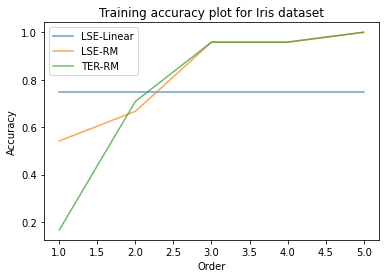

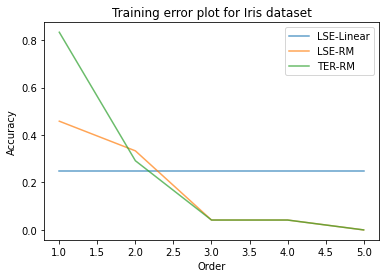

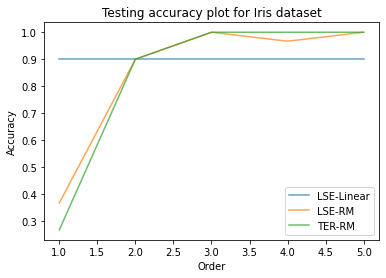

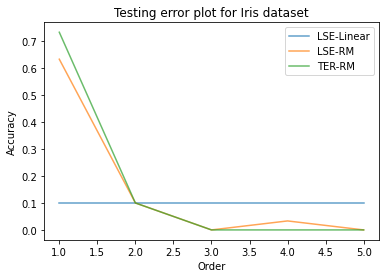

In [15]:
#### Main testing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = 'Iris'
if dataset is 'Digits':
  X, y = tra_scdata, tra_ohlbl
  X_t, y_t = tes_scdata, tes_ohlbl
elif dataset is 'Mushroom':
  X, y = agl_oh_data, agl_oh_lbl
  X, y = shuffle(X, y, random_state=42)
  X, X_t, y, y_t = train_test_split(X, y, test_size=0.2, random_state=42)
elif dataset is 'Iris':
  X, y = iris_data, iris_ohlbl
  X, y = shuffle(X, y, random_state=42)
  X, X_t, y, y_t = train_test_split(X, y, test_size=0.2, random_state=42)

lin_acc, lin_err = [], []
rm_acc, rm_err = [], []
ter_acc, ter_err = [], []
lin_acct, rm_acct, ter_acct = [], [], []
lin_errt, rm_errt, ter_errt = [], [], []

file_nm = str(dataset) + ".txt"
file = open(file_nm, 'w')   
print("5-Fold Cross Validation Training\n")
print("Dataset:", dataset)

model = 'LSE-Linear'
file.write("Model: " + model + "\n")
print("Model:", model)
for i in range(1, 6):  
  acc_mean, acc_std, err_mean, err_std, acc_tmean, acc_tstd, err_tmean, err_tstd = cv_training(X, y, i, model, X_t, y_t)
  acc_str = ("ACC: Order " + str(i) + " - Mean: " + str(acc_mean) + ", Standard Deviation: " + str(acc_std) + "\n")
  err_str = ("ERR: Order " + str(i) + " - Mean: " + str(err_mean) + ", Standard Deviation: " + str(err_std) + "\n")
  acc_tstr = ("TEST ACC: Order " + str(i) + " - Mean: " + str(acc_tmean) + ", Standard Deviation: " + str(acc_tstd) + "\n")
  err_tstr = ("TEST ERR: Order " + str(i) + " - Mean: " + str(err_tmean) + ", Standard Deviation: " + str(err_tstd) + "\n")
  print(acc_str, err_str, acc_tstr, err_tstr)
  file.write(acc_str)
  file.write(err_str)
  lin_acc.append(acc_mean)
  lin_err.append(err_mean)
  lin_acct.append(acc_tmean)
  lin_errt.append(err_tmean)
file.write("Accuracies (LSE-Linear): " + str(lin_acc) + "\n")
file.write("Errors (LSE-Linear): " + str(lin_err) + "\n")
print("Test Accuracy (LSE-Linear): " + str(lin_acct) + ", Test Error (LSE-Linear): " + str(lin_errt) + "\n")
file.write("Test Accuracy (LSE-Linear): " + str(lin_acct) + ", Test Error (LSE-Linear): " + str(lin_errt) + "\n\n")

model = 'LSE-RM'
file.write("Model: " + model + "\n")
print("Model:", model)
for i in range(1, 6):
  acc_mean, acc_std, err_mean, err_std, acc_tmean, acc_tstd, err_tmean, err_tstd = cv_training(X, y, i, model, X_t, y_t)
  acc_str = ("ACC: Order " + str(i) + " - Mean: " + str(acc_mean) + ", Standard Deviation: " + str(acc_std) + "\n")
  err_str = ("ERR: Order " + str(i) + " - Mean: " + str(err_mean) + ", Standard Deviation: " + str(err_std) + "\n")
  acc_tstr = ("TEST ACC: Order " + str(i) + " - Mean: " + str(acc_tmean) + ", Standard Deviation: " + str(acc_tstd) + "\n")
  err_tstr = ("TEST ERR: Order " + str(i) + " - Mean: " + str(err_tmean) + ", Standard Deviation: " + str(err_tstd) + "\n")
  print(acc_str, err_str, acc_tstr, err_tstr)
  file.write(acc_str)
  file.write(err_str)
  rm_acc.append(acc_mean)
  rm_err.append(err_mean)
  rm_acct.append(acc_tmean)
  rm_errt.append(err_tmean)
file.write("Accuracies (LSE-RM): " + str(rm_acc) + "\n")
file.write("Errors (LSE-RM): " + str(rm_err) + "\n")
print("Test Accuracy (LSE-RM): " + str(rm_acct) + ", Test Error (LSE-RM): " + str(rm_errt) + "\n")
file.write("Test Accuracy (LSE-RM): " + str(rm_acct) + ", Test Error (LSE-RM): " + str(rm_errt) + "\n\n")

model = 'TER-RM'
file.write("Model: " + model + "\n")
print("Model:", model)
for i in range(1, 6):  
  acc_mean, acc_std, err_mean, err_std, acc_tmean, acc_tstd, err_tmean, err_tstd = cv_training(X, y, i, model, X_t, y_t)
  acc_str = ("TRAIN ACC: Order " + str(i) + " - Mean: " + str(acc_mean) + ", Standard Deviation: " + str(acc_std) + "\n")
  err_str = ("TRAIN ERR: Order " + str(i) + " - Mean: " + str(err_mean) + ", Standard Deviation: " + str(err_std) + "\n")
  acc_tstr = ("TEST ACC: Order " + str(i) + " - Mean: " + str(acc_tmean) + ", Standard Deviation: " + str(acc_tstd) + "\n")
  err_tstr = ("TEST ERR: Order " + str(i) + " - Mean: " + str(err_tmean) + ", Standard Deviation: " + str(err_tstd) + "\n")
  print(acc_str, err_str, acc_tstr, err_tstr)
  file.write(acc_str)
  file.write(err_str)
  file.write(acc_tstr)
  file.write(err_tstr)
  ter_acc.append(acc_mean)
  ter_err.append(err_mean)
  ter_acct.append(acc_tmean)
  ter_errt.append(err_tmean)
file.write("Accuracies (TER-RM): " + str(ter_acc) + "\n")
file.write("Errors (TER-RM): " + str(ter_err) + "\n")
print("Test Accuracy (TER-RM): " + str(ter_acct) + ", Test Error (TER-RM): " + str(ter_errt) + "\n")
file.write("Test Accuracy (TER-RM): " + str(ter_acct) + ", Test Error (TER-RM): " + str(ter_errt) + "\n\n")
file.close()

# plot training accuracy graph
lin_acc, rm_acc, ter_acc = np.array(lin_acc), np.array(rm_acc), np.array(ter_acc)
x_range = np.arange(1, 6, 1)
plt.plot(x_range, lin_acc, label='LSE-Linear', alpha=0.7)
plt.plot(x_range, rm_acc, label='LSE-RM', alpha=0.7)
plt.plot(x_range, ter_acc, label='TER-RM', alpha=0.7)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Accuracy")
plt.title("Training accuracy plot for " + str(dataset) + " dataset")
plt.savefig(str(dataset) + "_train_acc.png")
plt.show()

# plot training error graph
x_range = np.arange(1, 6, 1)
plt.plot(x_range, np.array(lin_err), label='LSE-Linear', alpha=0.7)
plt.plot(x_range, np.array(rm_err), label='LSE-RM', alpha=0.7)
plt.plot(x_range, np.array(ter_err), label='TER-RM', alpha=0.7)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Accuracy")
plt.title("Training error plot for " + str(dataset) + " dataset")
plt.savefig(str(dataset) + "_train_err.png")
plt.show()

# plot testing accuracy graph
x_range = np.arange(1, 6, 1)
plt.plot(x_range, np.array(lin_acct), label='LSE-Linear', alpha=0.7)
plt.plot(x_range, np.array(rm_acct), label='LSE-RM', alpha=0.7)
plt.plot(x_range, np.array(ter_acct), label='TER-RM', alpha=0.7)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Accuracy")
plt.title("Testing accuracy plot for " + str(dataset) + " dataset")
plt.savefig(str(dataset) + "_test_acc.png")
plt.show()

# plot testing error graph
x_range = np.arange(1, 6, 1)
plt.plot(x_range, np.array(lin_errt), label='LSE-Linear', alpha=0.7)
plt.plot(x_range, np.array(rm_errt), label='LSE-RM', alpha=0.7)
plt.plot(x_range, np.array(ter_errt), label='TER-RM', alpha=0.7)
plt.legend()
plt.xlabel("Order")
plt.ylabel("Accuracy")
plt.title("Testing error plot for " + str(dataset) + " dataset")
plt.savefig(str(dataset) + "_test_err.png")
plt.show()